In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Read the CSV File that contains the meta data for each image.

In [47]:
fpn_csv = 'cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')


In [48]:
# data.head()

##### After conducting my first clustering submission, I decided that it would be good to try and separate some of the paintings from the photographs and sculptures.  That is why I created a dummy variable that included either a painting or not a painting.

In [49]:
for i in range(len(data["primary_medium"])):
    medium=(data["primary_medium"][i])
    if medium == "painting":
        data['medium'][i] = 1
    else:
        data['medium'][i] = 0


        

/Users/hubideal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/hubideal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Similar to the "medium" variable, I created a "movement" variable to identify if the image is an abstract image or not.

In [53]:
for k in range(len(data["art_movement"])):
    move=(data["art_movement"][k])
    if move == "abstraction":
        data['move'][k] = 1
    else:
        data['move'][k] = 0


/Users/hubideal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/hubideal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


##### Below, I created the bulk of my variables.  I am using Bertins classifications of point, line, area, and combined those features with his variables of orientation, value, size, color, shape, texture, and plane (which I don't think is part of Bertin's work).  I calculated these variables by multiplying the rating of point, line, area with one of Bertin's variables.  Then I divided these by 25 since that is the most possible from these variations.  This created 21 variables.  

In [54]:
data['pl&po'] = (data['pl']*data['po'])/25
data['pl&li'] = (data['pl']*data['li'])/25
data['pl&ar'] = (data['pl']*data['ar'])/25

data['si&po'] = (data['si']*data['po'])/25
data['si&li'] = (data['si']*data['li'])/25
data['si&ar'] = (data['si']*data['ar'])/25

data['va&po'] = (data['va']*data['po'])/25
data['va&li'] = (data['va']*data['li'])/25
data['va&ar'] = (data['va']*data['ar'])/25

data['te&po'] = (data['te']*data['po'])/25
data['te&li'] = (data['te']*data['li'])/25
data['te&ar'] = (data['te']*data['ar'])/25

data['co&po'] = (data['co']*data['po'])/25
data['co&li'] = (data['co']*data['li'])/25
data['co&ar'] = (data['co']*data['ar'])/25

data['or&po'] = (data['or']*data['po'])/25
data['or&li'] = (data['or']*data['li'])/25
data['or&ar'] = (data['or']*data['ar'])/25

data['sh&po'] = (data['sh']*data['po'])/25
data['sh&li'] = (data['sh']*data['li'])/25
data['sh&ar'] = (data['sh']*data['ar'])/25

In [55]:
X = data[['move','medium','pl&po', 'pl&li', 'pl&ar','si&po', 'si&li', 'si&ar', 'va&po', 'va&li', 'va&ar', 'te&po', 'te&li', 'te&ar', 'co&po', 'co&li', 'co&ar', 'or&po', 'or&li', 'or&ar', 'sh&po', 'sh&li', 'sh&ar' ]]

In [56]:
X.head()

,move,medium,pl&po,pl&li,pl&ar,si&po,si&li,si&ar,va&po,va&li,...,te&ar,co&po,co&li,co&ar,or&po,or&li,or&ar,sh&po,sh&li,sh&ar
0,0,1,0.0,0.0,0.4,0.0,0.0,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.6
1,0,0,0.0,0.0,0.8,0.0,0.0,0.6,0.0,0.0,...,0.6,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.4
2,0,1,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,...,0.8,0.0,0.0,0.8,0.0,0.0,0.4,0.0,0.0,0.8
3,1,1,0.0,0.0,0.8,0.0,0.0,0.6,0.0,0.0,...,0.4,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.8
4,1,1,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,0.8,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.8


In [57]:
from sklearn.cluster import KMeans

#### Created an elbow chart to identify the number of clusters.  It was not helpful, but a good exercise to check.

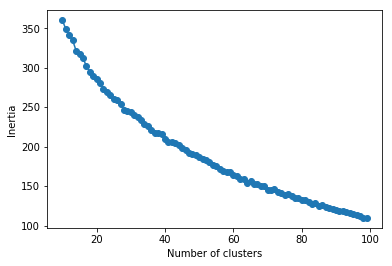

In [58]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(10, 100):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(10, 100), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [59]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

##### I also created silhouette charts to help identify the number of clusters.  

For n_clusters = 26 The average silhouette_score is : 0.129203945584


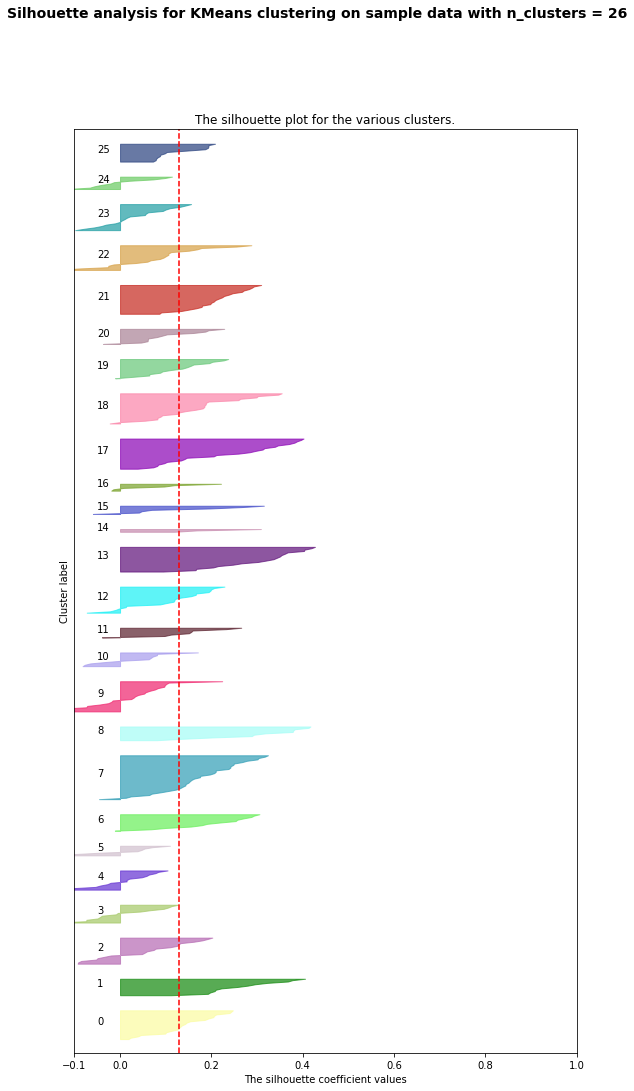

For n_clusters = 27 The average silhouette_score is : 0.154283984553


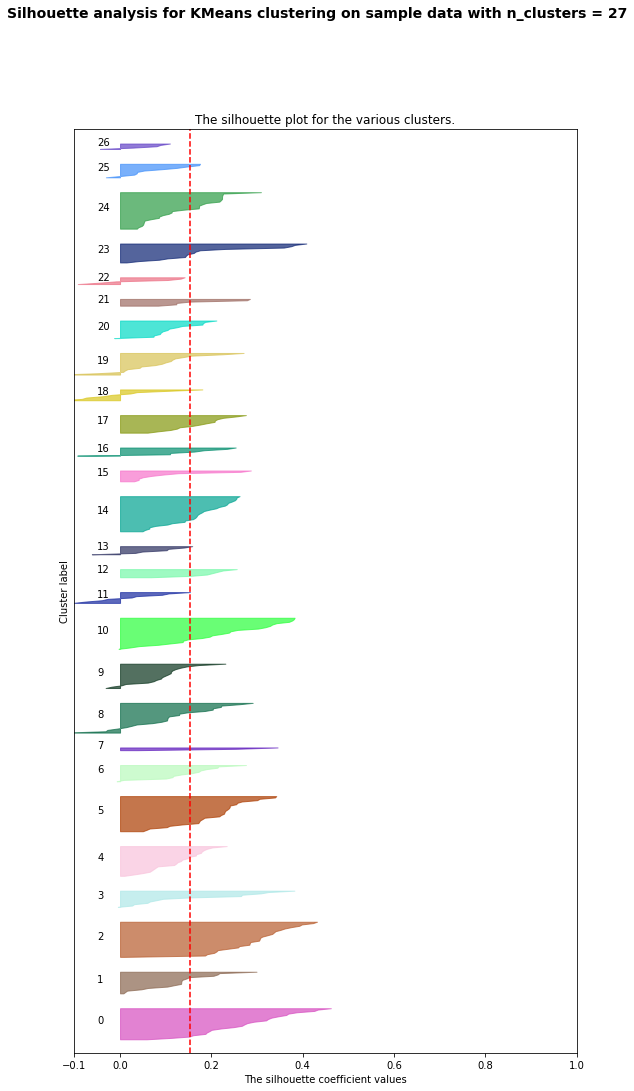

For n_clusters = 28 The average silhouette_score is : 0.144314505883


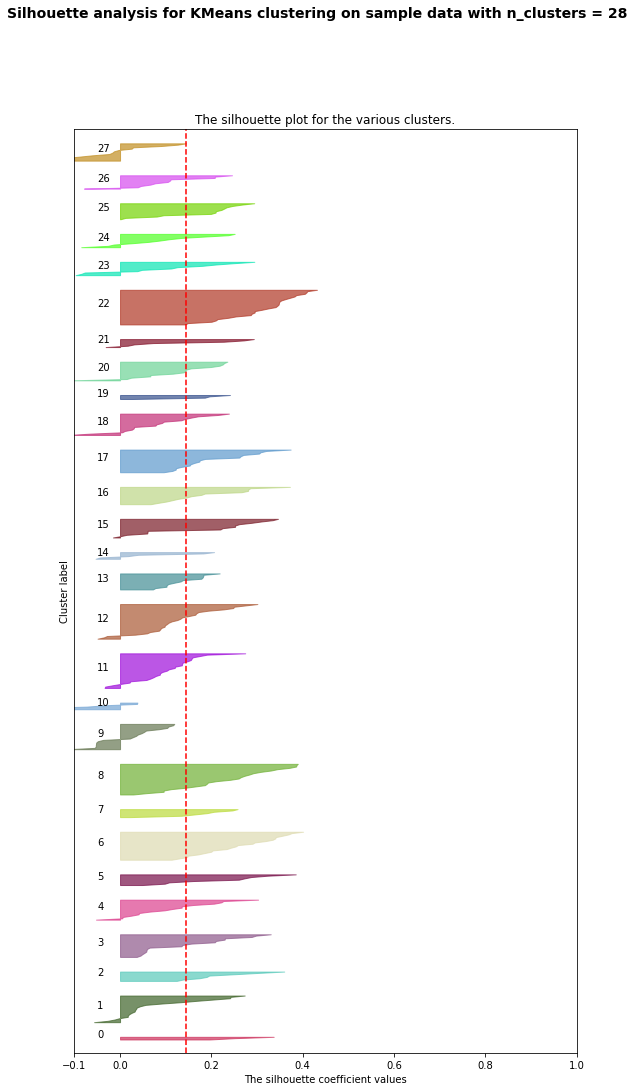

For n_clusters = 29 The average silhouette_score is : 0.137901694142


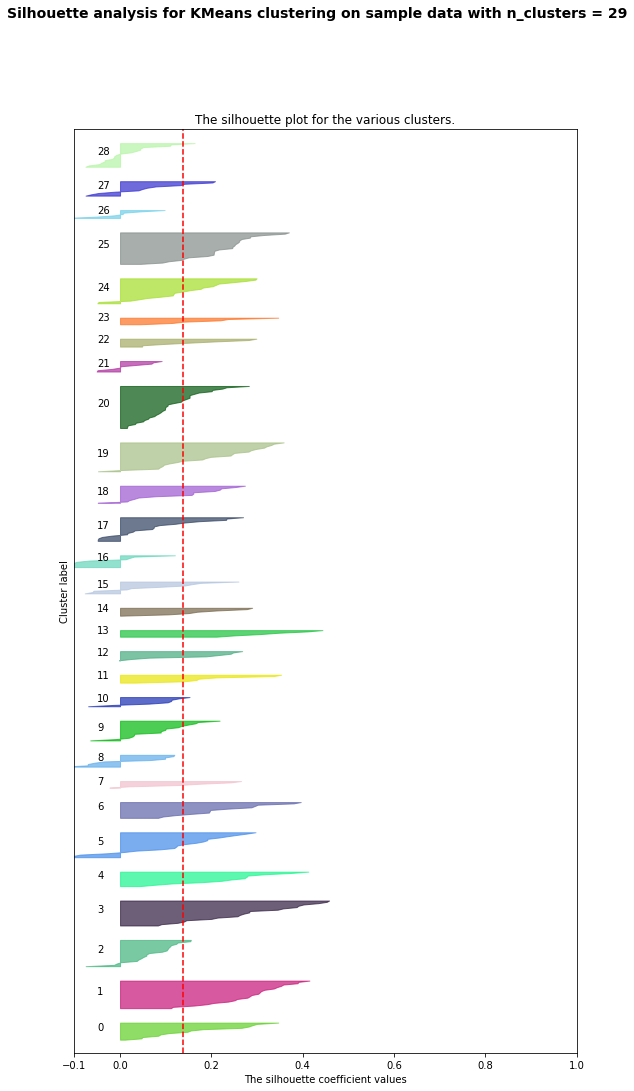

For n_clusters = 30 The average silhouette_score is : 0.1440609125


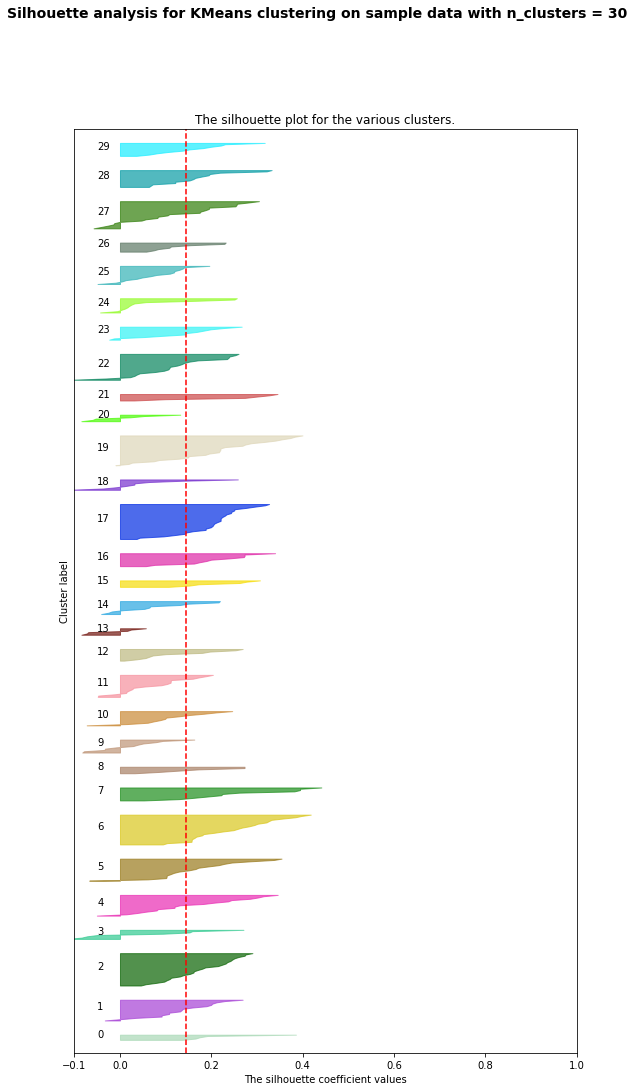

For n_clusters = 31 The average silhouette_score is : 0.144308302994


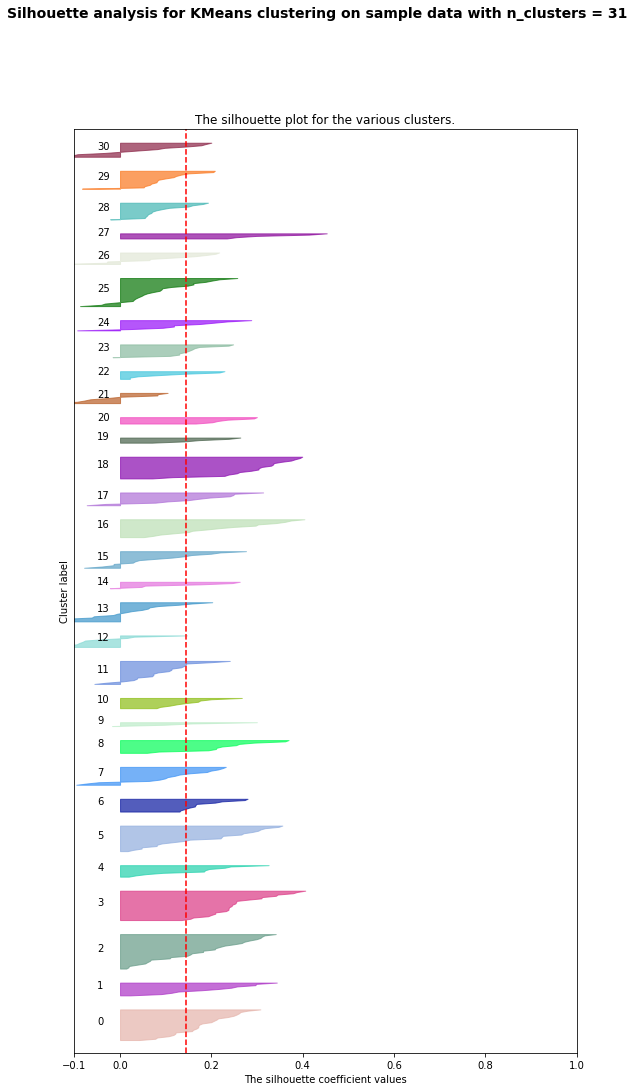

For n_clusters = 32 The average silhouette_score is : 0.141483453626


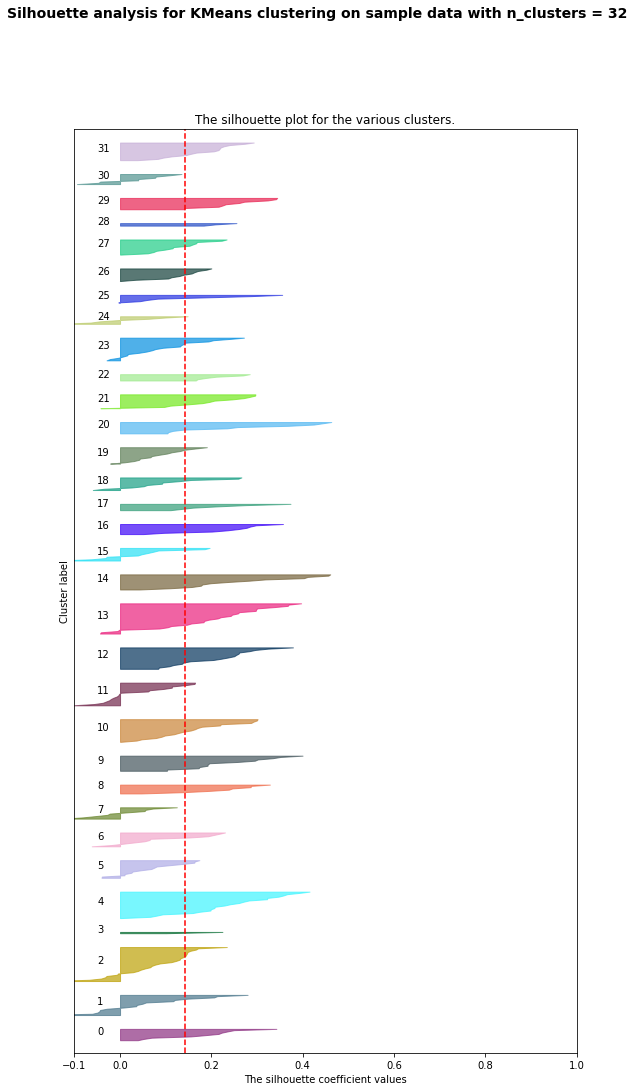

For n_clusters = 33 The average silhouette_score is : 0.153743869965


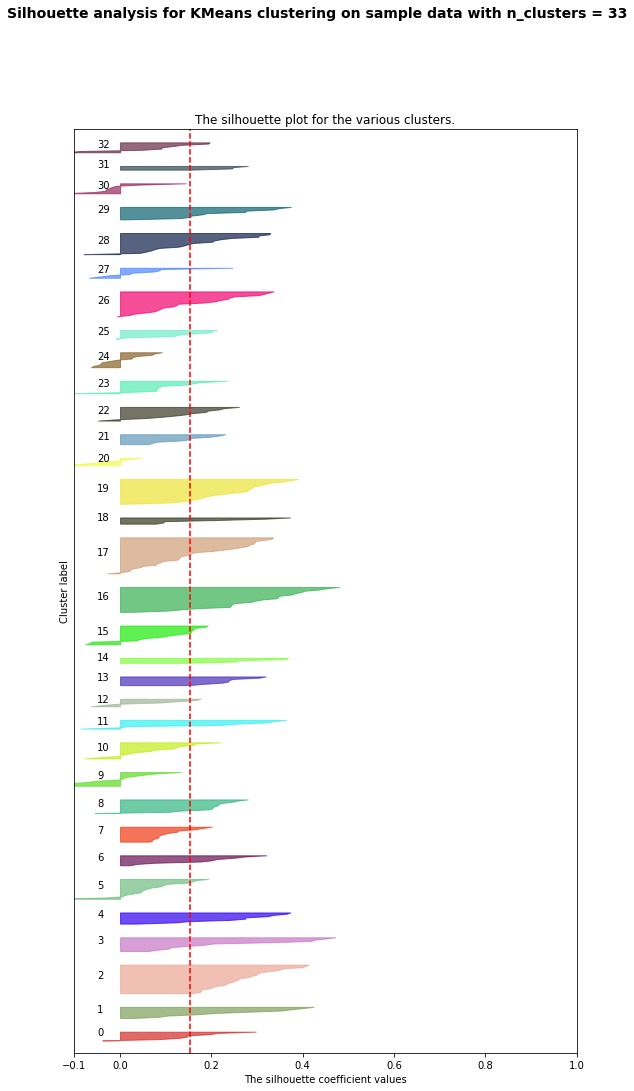

For n_clusters = 34 The average silhouette_score is : 0.15340159889


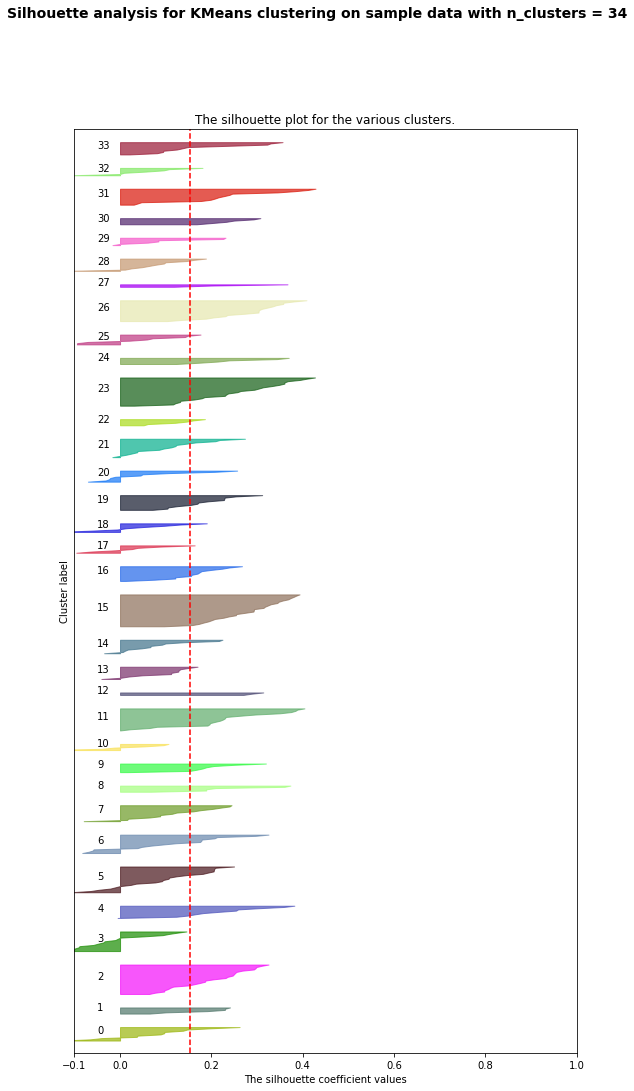

For n_clusters = 35 The average silhouette_score is : 0.146813370544


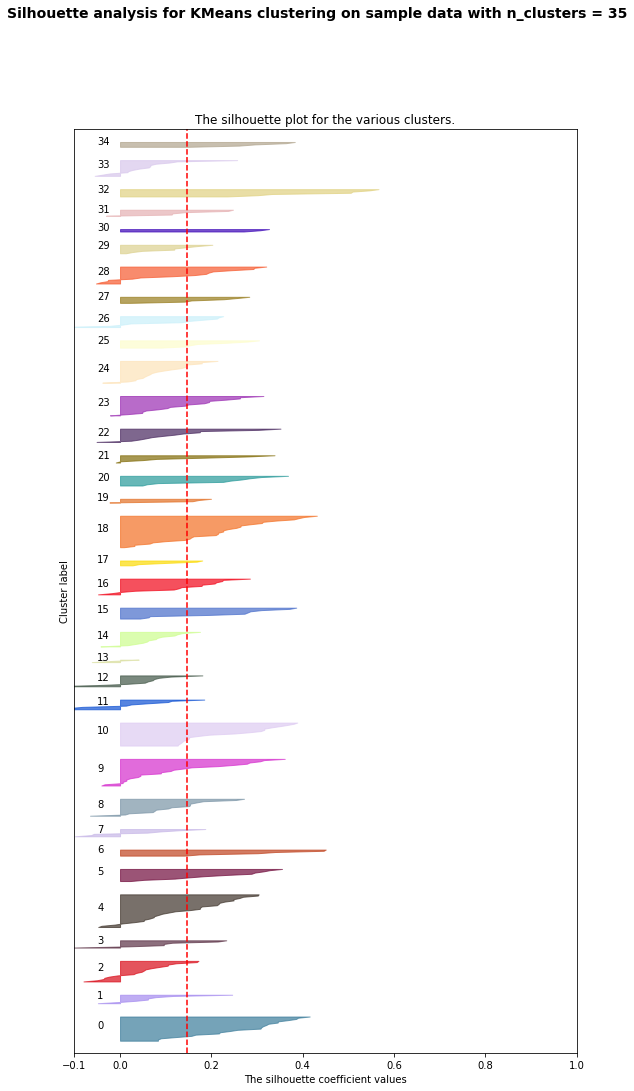

In [60]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

#### Determining the number of clusters
From my experience, this is not easy.  I chose 27 because I first knew there should be at least 21 since I used 21 Berin variables.  Also, from the silhouette analysis, I noticed that numbers started going down after 27.  So, I thought 27 clusters would be the most apporpriate.  

In [66]:
# set the number of clusters in the final model
my_n_clusters = 27

In [61]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)
labels = km.labels_

In [62]:
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
69_small.jpg
83_small.jpg
103_small.jpg
122_small.jpg
169_small.jpg
176_small.jpg
188_small.jpg
244_small.jpg
245_small.jpg
267_small.jpg
284_small.jpg
286_small.jpg
325_small.jpg
367_small.jpg
376_small.jpg
379_small.jpg
390_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
35_small.jpg
116_small.jpg
152_small.jpg
181_small.jpg
187_small.jpg
248_small.jpg
250_small.jpg
255_small.jpg
260_small.jpg
262_small.jpg
266_small.jpg
271_small.jpg
331_small.jpg
337_small.jpg
339_small.jpg
340_small.jpg
351_small.jpg
397_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 2
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
63_small.jpg
128_small.jpg
158_small.jpg
190_small.jpg
227_small.jpg
233_small

##### Below, is the code I wrote to create an html document with all of the images.  Also, I added my own comments to each cluster in my html document. 

In [63]:
import numpy as np
from pandas import *
clusterRange = my_n_clusters+1
for h in range(1, clusterRange):
    v=h-1
    w=str(v)
    clusterName=[]
    for i in range(len(labels)):
        if labels[i] == v:
            k = str(i + 2)
            artImage = '<td><img src="img_small/' + k + '_small.jpg"></td>' 
            clusterName.append(artImage)
    df = pd.DataFrame(clusterName)
    print(df)
    df.to_html('picturePages.html') 
    file = open('picturePages.html', "r")
    file = file.read()
    file = file.replace('&lt;', '<').replace('&gt;', '>')
    fileName = 'cluster'+ w + ".html"
    file2 = open(fileName, 'w')
    file2.write(file)
    file2.close()



                                               0
0    <td><img src="img_small/69_small.jpg"></td>
1    <td><img src="img_small/83_small.jpg"></td>
2   <td><img src="img_small/103_small.jpg"></td>
3   <td><img src="img_small/122_small.jpg"></td>
4   <td><img src="img_small/169_small.jpg"></td>
5   <td><img src="img_small/176_small.jpg"></td>
6   <td><img src="img_small/188_small.jpg"></td>
7   <td><img src="img_small/244_small.jpg"></td>
8   <td><img src="img_small/245_small.jpg"></td>
9   <td><img src="img_small/267_small.jpg"></td>
10  <td><img src="img_small/284_small.jpg"></td>
11  <td><img src="img_small/286_small.jpg"></td>
12  <td><img src="img_small/325_small.jpg"></td>
13  <td><img src="img_small/367_small.jpg"></td>
14  <td><img src="img_small/376_small.jpg"></td>
15  <td><img src="img_small/379_small.jpg"></td>
16  <td><img src="img_small/390_small.jpg"></td>
                                               0
0    <td><img src="img_small/35_small.jpg"></td>
1   <td><img src="im

                                              0
0    <td><img src="img_small/4_small.jpg"></td>
1    <td><img src="img_small/6_small.jpg"></td>
2    <td><img src="img_small/8_small.jpg"></td>
3   <td><img src="img_small/30_small.jpg"></td>
4   <td><img src="img_small/70_small.jpg"></td>
5  <td><img src="img_small/141_small.jpg"></td>
6  <td><img src="img_small/191_small.jpg"></td>
7  <td><img src="img_small/192_small.jpg"></td>
8  <td><img src="img_small/315_small.jpg"></td>
9  <td><img src="img_small/388_small.jpg"></td>


In [64]:
filename = "completeCluster.html"
dir = "/Users/hubideal/DataViz/ML_assignment_3/"

f = open(dir + filename,"w") 
f.write('hello')
f.close()

In [65]:

f = open(dir + filename,"w") 
for i in range(0, max(km.labels_)+1):
    f.write("<h2> Images in cluster: " + str(i) + "</h2>")
    
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            f.write( "<img src=" + dir + 'img_small/'+ str(data['s_no'][j]) +
                    '_small.jpg style=\"display:  inline-block\" width=\'200\' d-cluster=' + str(km.labels_[j]) + '>')
            
f.close()